In [1]:
import tensorflow as tf
from tensorflow import keras

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Create a CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=200)

C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/10
300/300 [==============================] - 30s 69ms/step - loss: 0.2502 - accuracy: 0.9302 - val_loss: 0.1054 - val_accuracy: 0.9679
Epoch 2/10
300/300 [==============================] - 23s 75ms/step - loss: 0.0761 - accuracy: 0.9777 - val_loss: 0.0616 - val_accuracy: 0.9798
Epoch 3/10
300/300 [==============================] - 21s 69ms/step - loss: 0.0520 - accuracy: 0.9853 - val_loss: 0.0502 - val_accuracy: 0.9833
Epoch 4/10
300/300 [==============================] - 19s 63ms/step - loss: 0.0389 - accuracy: 0.9889 - val_loss: 0.0470 - val_accuracy: 0.9840
Epoch 5/10
300/300 [==============================] - 19s 64ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0469 - val_accuracy: 0.9849
Epoch 6/10
300/300 [==============================] - 22s 73ms/step - loss: 0.0249 - accuracy: 0.9926 - val_loss: 0.0381 - val_accuracy: 0.9865
Epoch 7/10
300/300 [==============================] - 21s 71ms/step - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.0348 - val_accuracy:

In [2]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 2s - loss: 0.0424 - accuracy: 0.9858 - 2s/epoch - 6ms/step
Test accuracy: 0.98580002784729


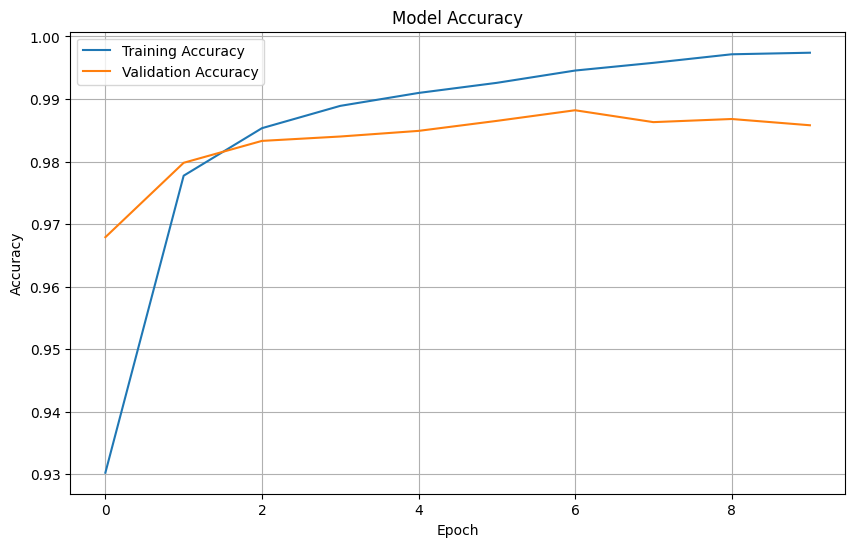

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title ('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=200)

Epoch 1/10
300/300 [==============================] - 34s 72ms/step - loss: 0.2597 - accuracy: 0.9263 - val_loss: 0.0977 - val_accuracy: 0.9699
Epoch 2/10
300/300 [==============================] - 21s 70ms/step - loss: 0.0834 - accuracy: 0.9758 - val_loss: 0.0637 - val_accuracy: 0.9789
Epoch 3/10
300/300 [==============================] - 21s 70ms/step - loss: 0.0572 - accuracy: 0.9832 - val_loss: 0.0529 - val_accuracy: 0.9827
Epoch 4/10
300/300 [==============================] - 21s 69ms/step - loss: 0.0435 - accuracy: 0.9873 - val_loss: 0.0594 - val_accuracy: 0.9806
Epoch 5/10
300/300 [==============================] - 21s 70ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0444 - val_accuracy: 0.9847
Epoch 6/10
300/300 [==============================] - 21s 71ms/step - loss: 0.0258 - accuracy: 0.9924 - val_loss: 0.0442 - val_accuracy: 0.9849
Epoch 7/10
300/300 [==============================] - 21s 71ms/step - loss: 0.0211 - accuracy: 0.9941 - val_loss: 0.0448 - val_accuracy:

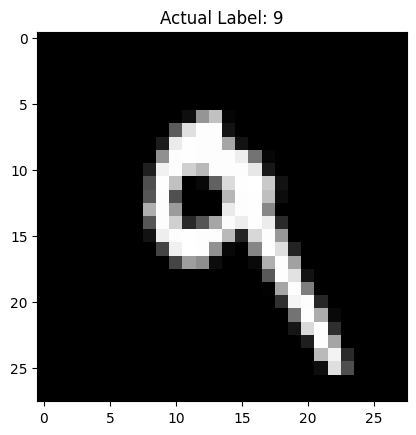

1/1 [==============================] - 0s 21ms/step
Predicted Label: 9


In [13]:
import matplotlib.pyplot as plt
import numpy as np  
image_index = 7
plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')
plt.title(f"Actual Label: {np.argmax(y_test[image_index])}")
plt.show()

test_image = X_test[image_index].reshape(1, 28, 28, 1)
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")
